<a href="https://colab.research.google.com/github/parastooshrf/fMRI-preprocessing/blob/main/fMRI_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nibabel nilearn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 80.8 MB/s eta 0:00:00


shape of fMRI data : (64, 64, 30, 184)


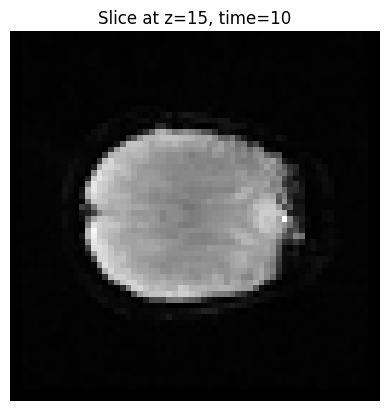

In [15]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np

# NIFTI file path
fmri_file = '/content/10_finger_foot_lips.nii'

# fmri load

img = nib.load(fmri_file)
data = img.get_fdata()

print("shape of fMRI data :", data.shape)

# select time point and slice index
timepoint = 10
z_slice = data.shape[2]// 2

# display the selected slice

plt.imshow(data[:, :, data.shape[2]//2, timepoint], cmap='gray')
plt.title(f"Slice at z={z_slice}, time={timepoint}")
plt.axis('off')
plt.show()

/tmp/ipython-input-17-3346206674.py:7: UserWarning: Casting data from int32 to float32
  plotting.plot_epi(img.slicer[..., 10], title='Original Image (t=10)')


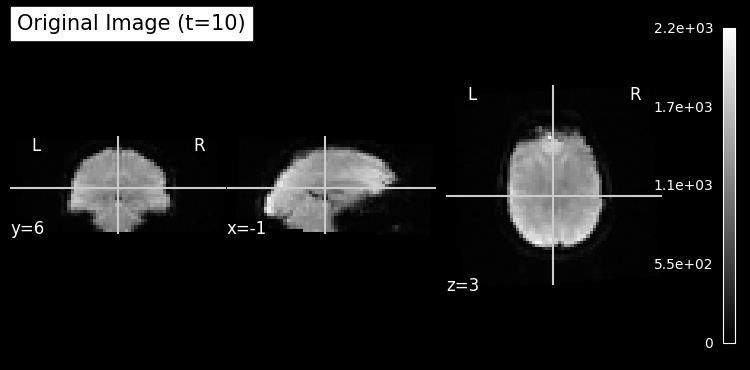

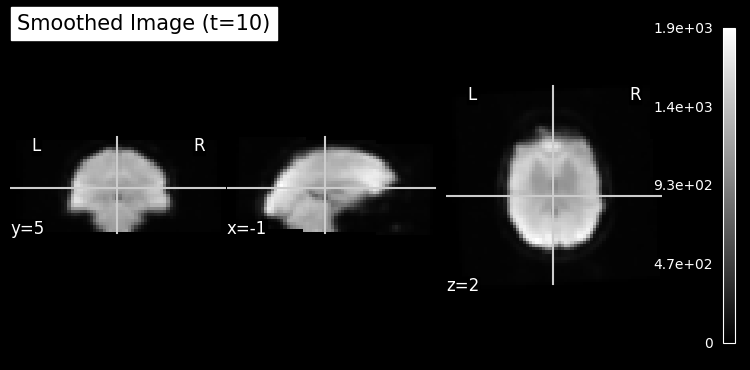

In [17]:
from nilearn import image, plotting

# apply smoothing with a Gaussian kernel (FWHM = 6 mm)
smoothed_img = image.smooth_img(img, fwhm=6)

# Plot smoothed vs original
plotting.plot_epi(img.slicer[..., 10], title='Original Image (t=10)')
plotting.plot_epi(smoothed_img.slicer[..., 10], title='Smoothed Image (t=10)')

In [24]:
# Apply smoothing to create "clean" version
smoothed_img = image.smooth_img(img, fwhm=6)
smoothed_data = smoothed_img.get_fdata()

# select a few slices and time points
z = data.shape[2]//2            #middle slice
time_indices = [10,20,30,40,50]
# reset X and Y to empty lists every time
X = [] #noisy
Y = [] #clean
print (type(X))
print (type(Y))
for t in time_indices:
  noisy_slice = data[:, :, z, t]
  clean_slice = smoothed_data[:, :, z, t]

  # Normalize between 0 and 1
  noisy_norm = (noisy_slice - noisy_slice.min()) / (noisy_slice.max() - noisy_slice.min())
  clean_norm = (clean_slice - clean_slice.min()) / (clean_slice.max() - clean_slice.min())

  X.append(noisy_norm)
  Y.append(clean_norm)

  #Convert to numpy array and add channel dim
  X = np.array(X)[..., np.newaxis]
  Y = np.array(Y)[..., np.newaxis]

  print(" X shape (noisy): ", X.shape)
  print(" Y shape (clean): ", Y.shape)

<class 'list'>
<class 'list'>
 X shape (noisy):  (1, 64, 64, 1)
 Y shape (clean):  (1, 64, 64, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'append'